In [1]:
import numpy as np
import torch

In [2]:
sample_per_carpet = 20

# 1. Lectura de archivos

## Funciones de Lectura de archivos

In [3]:
def read_cloud_csv(file):
    #Leer todo el archivo y saltamos el encabezado del archivo
    data = np.loadtxt(file, delimiter=',', skiprows=1)

    # Separar la primera línea de los datos que son las posiciones
    first_row_data = data[0, :]     #Posiciones del robot
    rest_data = data[1:, :]         #Nube de puntos

    #first_row_data, rest_data[:5]  #Mostramos la posicion y las primeras 5 del resto para verificar

    return first_row_data[::-1], rest_data

In [4]:
import os

def get_positions_and_cloud_points(sample_per_carpet):

    Posiciones_robot = []
    Nubes = []

    # Define la dirección (ruta) en la que deseas buscar los directorios
    ruta = 'Nubes'

    Elementos_en_orden = []
    for i in range(82):
        caso1= "mundo_"+str(i)
        Elementos_en_orden.append(caso1)
        caso2= "mundo_"+str(i)+"_1"
        Elementos_en_orden.append(caso2)

    # Lista todos los archivos y directorios en la ruta especificada
    todos_los_elementos = os.listdir(ruta)

    # Filtra solo los directorios
    solo_directorios = [elemento for elemento in todos_los_elementos if os.path.isdir(os.path.join(ruta, elemento))]

    Directorios_nubes = []
    for n in Elementos_en_orden:
        if n in solo_directorios:
            Directorios_nubes.append(n)


    inicio = 0
    for directorio in Directorios_nubes:

        ruta_directorio = ruta+"/"+directorio

        print(ruta_directorio, "inicio:", inicio)

        #Lista todos los archivos y directorios en la ruta especificada
        len_nombres_nubes = len(os.listdir(ruta_directorio))

        nombres_nubes = []
        for i in range(len_nombres_nubes):
            nombres_nubes.append("intersection_points_"+str(i)+".csv")
            
        #Tomamos una muestra por cada carpeta
        rand_index = [i for i in np.random.randint(0, len_nombres_nubes, sample_per_carpet)]

        nombres_nubes= [nombres_nubes[i] for i in np.sort(rand_index)]

        for nube in nombres_nubes:

            ruta_nubes = ruta_directorio +"/"+nube
            #Obtenemos a: la posicion y b: la nube de puntos
            a,b = read_cloud_csv(ruta_nubes)

            #!!!Si hay un valor infinito en la nube de puntos no la incluimos en nuestro conjunto
            if(np.any(np.isinf(b)) == False):
                Posiciones_robot.append(a)
                Nubes.append(b)
                inicio +=1
        

    Posiciones_robot= np.array(Posiciones_robot)

    return Posiciones_robot, Nubes

## Lectura

In [5]:
np.random.seed(7) 
Posiciones_robot, Nubes = get_positions_and_cloud_points(sample_per_carpet)

Nubes/mundo_0 inicio: 0
Nubes/mundo_1 inicio: 15
Nubes/mundo_2 inicio: 32
Nubes/mundo_2_1 inicio: 48
Nubes/mundo_3 inicio: 48
Nubes/mundo_3_1 inicio: 60
Nubes/mundo_4 inicio: 60
Nubes/mundo_4_1 inicio: 80
Nubes/mundo_5 inicio: 80
Nubes/mundo_5_1 inicio: 100
Nubes/mundo_6 inicio: 100
Nubes/mundo_7 inicio: 100
Nubes/mundo_8 inicio: 100
Nubes/mundo_9 inicio: 100
Nubes/mundo_10 inicio: 100
Nubes/mundo_11 inicio: 100
Nubes/mundo_12 inicio: 100
Nubes/mundo_13 inicio: 100
Nubes/mundo_13_1 inicio: 116
Nubes/mundo_14 inicio: 116
Nubes/mundo_14_1 inicio: 128
Nubes/mundo_15 inicio: 128
Nubes/mundo_15_1 inicio: 146
Nubes/mundo_16 inicio: 146
Nubes/mundo_16_1 inicio: 159
Nubes/mundo_17 inicio: 159
Nubes/mundo_17_1 inicio: 173
Nubes/mundo_18 inicio: 173
Nubes/mundo_18_1 inicio: 184
Nubes/mundo_19 inicio: 184
Nubes/mundo_19_1 inicio: 193
Nubes/mundo_20 inicio: 193
Nubes/mundo_20_1 inicio: 202
Nubes/mundo_21 inicio: 202
Nubes/mundo_21_1 inicio: 206
Nubes/mundo_22 inicio: 206
Nubes/mundo_22_1 inicio: 2

# 2. 

In [6]:
len(Posiciones_robot)

897

In [7]:
len(Nubes[0])

640

In [8]:
len(Nubes)

897

# 3. Medidas de Similitud

In [9]:
def mean_squared_error(nube1, nube2):
    return np.sum( (nube1[:,0] - nube2[:,0]) ** 2 + (nube1[:,1] - nube2[:,1]) ** 2) / len(nube1)

# 4. Aplicando Similitud

Ejemplo de similitud entre la nube 0 y la nube 1

In [10]:
mean_squared_error(Nubes[0],Nubes[1])

9.86192223633719e-06

Calculo de Similitud para cada nube con el resto de nubes

In [50]:
Nubes_Similitud = np.zeros((len(Nubes),len(Nubes)))

max_value = 0

for i in range(len(Nubes)):
    if(i%100 == 0):
            print(i,"/",len(Nubes_Similitud))
    for j in range(len(Nubes)):
        Nubes_Similitud[i][j] = mean_squared_error(Nubes[i], Nubes[j])
        
    max_value = max(np.max(Nubes_Similitud[i]), max_value)

print(max_value)

0 / 897
100 / 897
200 / 897
300 / 897
400 / 897
500 / 897
600 / 897
700 / 897
800 / 897
33.35636017768231


Función para obtener el top x de nubes de puntos y sus valores de similitud

In [12]:
def print_similitud_de_nube(num_cloud, num_top):

    sort_index = np.argsort(Nubes_Similitud[num_cloud])
    sort_values = np.sort(Nubes_Similitud[num_cloud])

    print("Top ", num_top, " de las nubes de mayor similitud de la nube ", num_cloud)
    print("-"*25)
    for i in range(num_top+1):
        print(i,"- Indice nube: ",sort_index[i], "\t Valor de Similitud: ",sort_values[i])
    
    #Devolvemos los indices y valores ordenados de mayor similitud a menor similitud
    #return sort_index, sort_values

Ejemplo para la nube 1 de las nubes con mayor similitud y sus valores de similitud

In [13]:
print_similitud_de_nube(1, 100)

Top  100  de las nubes de mayor similitud de la nube  1
-------------------------
0 - Indice nube:  1 	 Valor de Similitud:  0.0
1 - Indice nube:  0 	 Valor de Similitud:  9.86192223633719e-06
2 - Indice nube:  16 	 Valor de Similitud:  0.12727643158592847
3 - Indice nube:  15 	 Valor de Similitud:  0.12727643158592847
4 - Indice nube:  2 	 Valor de Similitud:  0.1408564931206815
5 - Indice nube:  3 	 Valor de Similitud:  0.17692311291157434
6 - Indice nube:  17 	 Valor de Similitud:  0.3514740355132689
7 - Indice nube:  32 	 Valor de Similitud:  0.38776413002005966
8 - Indice nube:  33 	 Valor de Similitud:  0.38776413002005966
9 - Indice nube:  34 	 Valor de Similitud:  0.5451357440598285
10 - Indice nube:  35 	 Valor de Similitud:  0.5451357440598285
11 - Indice nube:  4 	 Valor de Similitud:  0.5503689051377562
12 - Indice nube:  36 	 Valor de Similitud:  0.6309025516556812
13 - Indice nube:  18 	 Valor de Similitud:  0.7377745676967291
14 - Indice nube:  37 	 Valor de Similitud:  

# 5. Construcción de los buenos ejemplos y malos ejemplos

In [14]:
def get_good_and_bad_samples(Nubes_Similitud, k, l):

    Good_Samples = []
    Bad_Samples = []

    for i in range(len(Nubes_Similitud)):
        if(i%100 == 0):
            print(i,"/",len(Nubes_Similitud))
            
        #Valores ordenados de menor a mayor
        sort_index = np.argsort(Nubes_Similitud[i])
        #sort_values = np.sort(Nubes_Similitud[i])

        #print([[i,j] for i,j in zip(np.ones(k, dtype=int)*i,sort_index[:k])])

        for ll in range(l):
            #[i,gs]
            Good_Samples.append([i,sort_index[ll]])
            #[[i,bs_0],...,[i,bs_k]]
            Bad_Samples.append([[i,j] for i,j in zip(np.ones(k, dtype=int)*i,(sort_index[::-1])[ll:ll+k])])

    return Good_Samples, Bad_Samples


Valor L para especificar el tamaño de contexto, es decir, el número de buenos ejemplos que tomaremos de sus L nubes más similares

In [15]:
L = 100 #50,75,100

Valor K para seleccionar K malos ejemplos para cada buen ejemplo

In [16]:
K = 5 #2,3,4,5

In [17]:
Good_Samples, Bad_Samples = get_good_and_bad_samples(Nubes_Similitud, K, L)

0 / 897
100

 / 897
200 / 897
300 / 897
400 / 897
500 / 897
600 / 897
700 / 897
800 / 897


Vista de los Buenos ejemplos y los Malos ejemplos

In [18]:
def print_Good_Samples_Bad_Samples(cloud_idx, L , K, Good_Samples, Bad_Samples):
    print("Buenos ejemplos + \t\t Malos ejemplos -")
    print("w c_pos           \t\t w c_neg")
    print("-------------"*K)
    for i in range(L):
        print(Good_Samples[cloud_idx*L+i]," \t\t",Bad_Samples[cloud_idx*L+i])


In [19]:
print_Good_Samples_Bad_Samples(1, L , K, Good_Samples, Bad_Samples)

Buenos ejemplos + 		 Malos ejemplos -
w c_pos           		 w c_neg
-----------------------------------------------------------------
[1, 1]  		 [[1, 347], [1, 294], [1, 364], [1, 333], [1, 313]]
[1, 0]  		 [[1, 294], [1, 364], [1, 333], [1, 313], [1, 282]]
[1, 16]  		 [[1, 364], [1, 333], [1, 313], [1, 282], [1, 312]]
[1, 15]  		 [[1, 333], [1, 313], [1, 282], [1, 312], [1, 293]]
[1, 2]  		 [[1, 313], [1, 282], [1, 312], [1, 293], [1, 363]]
[1, 3]  		 [[1, 282], [1, 312], [1, 293], [1, 363], [1, 376]]
[1, 17]  		 [[1, 312], [1, 293], [1, 363], [1, 376], [1, 272]]
[1, 32]  		 [[1, 293], [1, 363], [1, 376], [1, 272], [1, 362]]
[1, 33]  		 [[1, 363], [1, 376], [1, 272], [1, 362], [1, 270]]
[1, 34]  		 [[1, 376], [1, 272], [1, 362], [1, 270], [1, 271]]
[1, 35]  		 [[1, 272], [1, 362], [1, 270], [1, 271], [1, 346]]
[1, 4]  		 [[1, 362], [1, 270], [1, 271], [1, 346], [1, 235]]
[1, 36]  		 [[1, 270], [1, 271], [1, 346], [1, 235], [1, 375]]
[1, 18]  		 [[1, 271], [1, 346], [1, 235], [1, 375], 

# 6. Construcción del Conjunto de Entrenamiento y de Validación

Tomamos un 80% de conjunto de entrenamiento y 20% de conjunto de validación

In [20]:
from sklearn.model_selection import train_test_split

Good_Samples_train,Good_Samples_val,Bad_Samples_train,Bad_Samples_val = train_test_split(Good_Samples, Bad_Samples, test_size=0.2)

print("GS_Train size:", len(Good_Samples_train))
print("GS_Val   size:", len(Good_Samples_val))
print("BS_Train size:", len(Bad_Samples_train))
print("BS_Val   size:", len(Bad_Samples_val))

GS_Train size: 71760
GS_Val   size: 17940
BS_Train size: 71760
BS_Val   size: 17940


In [21]:
from torch.utils.data import DataLoader, TensorDataset

batch_size = 1
num_workers = 2

#Entrenamiento
train_dataset = TensorDataset(torch.tensor([ [pos_pairs[0]]+ [p[0] for p in neg_pairs] for pos_pairs, neg_pairs in zip(Good_Samples_train, Bad_Samples_train) ],dtype=torch.int), #Cloud
                              torch.tensor([ [pos_pairs[1]]+ [p[1] for p in neg_pairs] for pos_pairs, neg_pairs in zip(Good_Samples_train, Bad_Samples_train) ],dtype=torch.int), #Context
                              torch.tensor([[1] + [0]*(len(neg_pairs)) for pos_pairs, neg_pairs in zip(Good_Samples_train, Bad_Samples_train)] , dtype=torch.float ))

train_loader = DataLoader(train_dataset,
                          batch_size=batch_size,
                          num_workers=num_workers,
                          shuffle=True)

#Validacion
val_dataset = TensorDataset(torch.tensor([ [pos_pairs[0]]+ [p[0] for p in neg_pairs] for pos_pairs, neg_pairs in zip(Good_Samples_val, Bad_Samples_val) ],dtype=torch.int), #Cloud
                              torch.tensor([ [pos_pairs[1]]+ [p[1] for p in neg_pairs] for pos_pairs, neg_pairs in zip(Good_Samples_val, Bad_Samples_val) ],dtype=torch.int), #Context
                              torch.tensor([[1] + [0]*(len(neg_pairs)) for pos_pairs, neg_pairs in zip(Good_Samples_val, Bad_Samples_val)] , dtype=torch.float ))

val_loader = DataLoader(val_dataset,
                          batch_size=batch_size,
                          num_workers=num_workers,
                          shuffle=False)


Tamaño de batch: [batch_size x K]

In [22]:
batch = next(iter(train_loader))
print(f'GS shape: {batch[0].shape}')
print(f'BS shape: {batch[1].shape}')
print(f'Label shape: {batch[2].shape}')

GS shape: torch.Size([1, 6])
BS shape: torch.Size([1, 6])
Label shape: torch.Size([1, 6])


# 7. Definición del modelo 

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score

class SGNSModel(nn.Module):
    def __init__(self, num_clouds, embedding_dim, K):
        super(SGNSModel, self).__init__()
        # Embedding para las nubes
        self.cloud_embeddings = nn.Embedding(num_clouds, embedding_dim)
        # Embedding para los contextos 
        self.context_embeddings = nn.Embedding(num_clouds, embedding_dim)
        # Capa de regresión logística
        self.logistic_regression = nn.Linear(embedding_dim, 1+K)
        # Función de activación sigmoide
        self.activation = nn.Sigmoid()
        
    def forward(self, cloud_indices, context_indices, labels, want_print = 0):
        # Obtener embeddings
        cloud_embeds = self.cloud_embeddings(cloud_indices)
        context_embeds = self.context_embeddings(context_indices)
        #context_embeds = self.cloud_embeddings(context_indices)

        # Producto punto entre la nube y el contexto
        dot_product = (cloud_embeds * context_embeds).sum(dim=2)

        if(want_print):
            print("W: ",cloud_embeds)
            print("C:", context_embeds)
            print("dot: ", dot_product)

        #print(cloud_embeds.shape)
        #print(context_embeds.shape)
        #print(dot_product.shape)

        # Pasar el producto punto a través de la regresión logística y luego a través de la sigmoide
        predictions = self.activation(dot_product.unsqueeze(1))
        
        return predictions
    


Función para evaluar conjunto de validación

In [24]:
def model_eval(data, model, criterion):
    with torch.no_grad():
        preds, tgts = [], []
        epoch_loss = []
        for cloud_indices, context_indices, labels in data:

            #Obtener predicción
            predictions = model(cloud_indices, context_indices, labels)
            #predictions = predictions.numpy()

            tgt = labels.numpy()
            tgts.append(tgt)
            preds.append(predictions.squeeze(1))

            #print(predictions.squeeze().numpy())
            loss = criterion(predictions.squeeze(1), labels)
            #print(predictions.squeeze(), labels)
            epoch_loss.append(loss.item())
            

    tgts = [e for l in tgts for e in l]
    preds = [e for l in preds for e in l]

    return np.mean(epoch_loss)

In [25]:
import shutil 

def save_checkpoint(state, is_best, checkpoint_path, filename="checkpoint.pt"):
    filename = os.path.join(checkpoint_path, filename)
    torch.save(state, filename)
    if is_best:
        shutil.copyfile(filename, os.path.join(checkpoint_path, "model_best.pt"))
        print("Saved-Model")

Función para entrenar el modelo

In [26]:
def train_model(model, train_loader, val_loader, epochs=10, learning_rate=0.001):

    best_metric = 10000
    
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.BCELoss()
    #optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    #criterion = nn.CrossEntropyLoss()
    
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        loss_epoch = []

        for cloud_indices, context_indices, labels in train_loader:
            
            # Forward pass
            predictions = model(cloud_indices, context_indices, labels)
            #print((predictions.squeeze(1)).shape)
            #print(labels.shape)
            loss = criterion(predictions.squeeze(1), labels)
            total_loss += loss.item()
            loss_epoch.append(loss.item())
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    

        
        #Metricas del conjunto de validación
        model.eval()
        tuning_metric = model_eval(val_loader, model, criterion)
        total_loss = np.mean(loss_epoch)

        is_improvement = tuning_metric < best_metric

        save_checkpoint(
            {
                "epoch": epoch,
                "state_dict": model.state_dict(),
                "optimizer": optimizer.state_dict(),
            },
            is_improvement,
            "model",
        )

        print(f'Epoch {epoch}, Loss: {total_loss}, Val loss: {tuning_metric}')

# 8. Entrenamiento

In [27]:
num_clouds = len(Nubes)
embedding_dim = 50

# Inicializar modelo
model = SGNSModel(num_clouds, embedding_dim, K)

#print(model.word_embeddings(torch.tensor(0, dtype=torch.long)))
want_a_new_model = False

if want_a_new_model:
    # Entrenar el modelo
    train_model(model, train_loader, val_loader, epochs=50, learning_rate=0.0001)
else:
    model.load_state_dict(torch.load('model/model_best.pt')['state_dict'])
#print(model.word_embeddings(torch.tensor(0, dtype=torch.long)))

Saved-Model
Epoch 0, Loss: 3.2606280575691526, Val loss: 2.9425274807663313
Saved-Model
Epoch 1, Loss: 2.649608971583663, Val loss: 2.4457945683695836
Saved-Model
Epoch 2, Loss: 2.1551614156706997, Val loss: 1.9955452306217207
Saved-Model
Epoch 3, Loss: 1.705980207193879, Val loss: 1.5923092738697593
Saved-Model
Epoch 4, Loss: 1.2865069389557062, Val loss: 1.1963816074444
Saved-Model
Epoch 5, Loss: 0.9002672077362491, Val loss: 0.8342506733425546
Saved-Model
Epoch 6, Loss: 0.5909936665556196, Val loss: 0.5640151410289752
Saved-Model
Epoch 7, Loss: 0.3826783444672093, Val loss: 0.3841160294117928
Saved-Model
Epoch 8, Loss: 0.252860042155868, Val loss: 0.2709571643535233
Saved-Model
Epoch 9, Loss: 0.17039409694470167, Val loss: 0.19510404645685175
Saved-Model
Epoch 10, Loss: 0.11539758877988068, Val loss: 0.1416162798114369
Saved-Model
Epoch 11, Loss: 0.07801409960406573, Val loss: 0.10270959440150756
Saved-Model
Epoch 12, Loss: 0.05247468950939617, Val loss: 0.07428703348301653
Saved-Mo

In [28]:
for cloud_indices, context_indices, labels in val_loader:
    with torch.no_grad():
        predictions = model(cloud_indices, context_indices, 0).squeeze()
    break

for i in range(len(labels)):
    print(cloud_indices[i])
    print(context_indices[i])
    print(predictions[i])
    print(labels[i])
    print("----")


tensor([282, 282, 282, 282, 282, 282], dtype=torch.int32)
tensor([266, 713, 579, 377, 562, 335], dtype=torch.int32)
tensor(1.)
tensor([1., 0., 0., 0., 0., 0.])
----


Funcion para obtener los embeddings más cercanos del embedding

In [29]:
def print_closest_clouds(model, num_cloud, top_num):
    cloud_emb = model.cloud_embeddings.weight[num_cloud] 
    dists = torch.norm(model.cloud_embeddings.weight - cloud_emb, dim=1 ).detach()
    #print(dists)
    sorted_differences = sorted(enumerate(dists.numpy()), key=lambda x: x[1])
    index_differences = [idx for idx, difference in sorted_differences]
    val_differences = [difference for idx, difference in sorted_differences]
    print("Top Embbedings más cercanos de la nube ", num_cloud)
    print("-"*20)
    i = 0
    for idx, difference in zip(index_differences[0:top_num+1], val_differences[0:top_num+1]):
         print(i,"- Indice nube:", idx, "\t Norma de la diferencia:", difference, 
              "\t Medida de Similitud: ", Nubes_Similitud[num_cloud][idx])
         i+=1

    return index_differences, val_differences

Funcion para obtener los embeddings más lejanos del embedding

In [30]:
def print_farest_clouds(model, num_cloud, top_num):
    cloud_emb = model.cloud_embeddings.weight[num_cloud]
    dists = torch.norm(model.cloud_embeddings.weight - cloud_emb, dim=1 ).detach()
    #print(dists)
    sorted_differences = sorted(enumerate(dists.numpy()), key=lambda x: x[1])
    sorted_differences = sorted_differences[::-1]

    index_differences = [idx for idx, difference in sorted_differences]
    val_differences = [difference for idx, difference in sorted_differences]
    #print(lst)
    print("Top Embbedings más lejanos de la nube ", num_cloud)
    print("-"*20)
    i = len(sorted_differences)-1
    for idx, difference in zip(index_differences[0:top_num+1], val_differences[0:top_num+1]):
        print(i,"- Indice nube:", idx, "\t Norma de la diferencia:", difference, 
              "\t Medida de Similitud: ", Nubes_Similitud[num_cloud][idx])
        i-=1

    return index_differences, val_differences

In [31]:
list_closest, norm_closest = print_closest_clouds(model, 1, 10)

Top Embbedings más cercanos de la nube  1
--------------------
0 - Indice nube: 1 	 Norma de la diferencia: 0.0 	 Medida de Similitud:  0.0
1 - Indice nube: 93 	 Norma de la diferencia: 5.583282 	 Medida de Similitud:  3.50776330908822
2 - Indice nube: 51 	 Norma de la diferencia: 6.0476775 	 Medida de Similitud:  1.463483868792002
3 - Indice nube: 9 	 Norma de la diferencia: 6.0790577 	 Medida de Similitud:  1.426650050467591
4 - Indice nube: 90 	 Norma de la diferencia: 6.37088 	 Medida de Similitud:  2.051711222918983
5 - Indice nube: 80 	 Norma de la diferencia: 6.4430037 	 Medida de Similitud:  1.3476922798251898
6 - Indice nube: 6 	 Norma de la diferencia: 6.5205994 	 Medida de Similitud:  1.2074819317566483
7 - Indice nube: 53 	 Norma de la diferencia: 6.5758643 	 Medida de Similitud:  1.5618306479557327
8 - Indice nube: 72 	 Norma de la diferencia: 6.6259108 	 Medida de Similitud:  2.3997237289181292
9 - Indice nube: 40 	 Norma de la diferencia: 6.66543 	 Medida de Similitud:  

In [32]:
with torch.no_grad():
    torch_cloud = torch.tensor([[1 , 1, 1, 1, 1, 1]], dtype=torch.int)
    torch_context = torch.tensor([[179 , 0, 2, 3, 4, 5]], dtype=torch.int)
    predictions = model(torch_cloud, torch_context, 0, 0).squeeze()

    print(torch_cloud)
    print(torch_context)
    print(predictions)
    print([1,5] in Good_Samples)
    #print(labels[i])


tensor([[1, 1, 1, 1, 1, 1]], dtype=torch.int32)
tensor([[179,   0,   2,   3,   4,   5]], dtype=torch.int32)
tensor([0.9938, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
True


In [33]:
list_farest, norm_farest = print_farest_clouds(model, 1, 10)

Top Embbedings más lejanos de la nube  1
--------------------
896 - Indice nube: 292 	 Norma de la diferencia: 13.965113 	 Medida de Similitud:  19.81203632241823
895 - Indice nube: 230 	 Norma de la diferencia: 13.640302 	 Medida de Similitud:  15.711408343215487
894 - Indice nube: 235 	 Norma de la diferencia: 13.473086 	 Medida de Similitud:  20.300474211755
893 - Indice nube: 219 	 Norma de la diferencia: 13.353173 	 Medida de Similitud:  16.39775071276937
892 - Indice nube: 288 	 Norma de la diferencia: 13.320083 	 Medida de Similitud:  15.55333857196943
891 - Indice nube: 246 	 Norma de la diferencia: 13.3195915 	 Medida de Similitud:  15.648832419949382
890 - Indice nube: 307 	 Norma de la diferencia: 13.314717 	 Medida de Similitud:  15.969792129909006
889 - Indice nube: 310 	 Norma de la diferencia: 13.265613 	 Medida de Similitud:  19.562719145253443
888 - Indice nube: 291 	 Norma de la diferencia: 13.193115 	 Medida de Similitud:  19.517951385244775
887 - Indice nube: 261 	 

# 9. Visualización de las nubes de puntos cercanas

In [34]:
import matplotlib.pyplot as plt
import numpy as np

def print_two_cloud_points(cloud_1, cloud_2):
    num_nube = cloud_1
    num_nube_next = cloud_2

    #print(Nubes[num_nube])

    # Dividir el arreglo de coordenadas en dos arreglos x e y
    x1 = [cord[0]+Posiciones_robot[num_nube][0] for cord in Nubes[num_nube]]
    y1 = [-cord[1]+Posiciones_robot[num_nube][1] for cord in Nubes[num_nube]]


    #print(Posiciones_robot[num_nube][0] ," ", Posiciones_robot[num_nube][1])

    x2 = [cord[0]+Posiciones_robot[num_nube_next][0] for cord in Nubes[num_nube_next]]
    y2 = [-cord[1]+Posiciones_robot[num_nube_next][1] for cord in Nubes[num_nube_next]]


    #print(Posiciones_robot[num_nube_next][0] ," ", Posiciones_robot[num_nube_next][1])

    # Crear la figura y el eje para la gráfica
    fig, ax = plt.subplots()

    # Graficar los puntos
    ax.scatter(y1, x1, color='red', marker='o', label='Conjunto 1')
    ax.scatter(y2, x2, color='blue', marker='x',  label='Conjunto 2')
    ax.scatter(Posiciones_robot[num_nube][1], Posiciones_robot[num_nube][0], color='orange', marker='o', label='Conjunto 1')
    ax.scatter(Posiciones_robot[num_nube_next][1], Posiciones_robot[num_nube_next][0], color='green', marker='x',  label='Conjunto 2')


    # Opcional: establecer títulos para los ejes y la gráfica
    ax.set_title('Gráfica de Posiciones del Robot')
    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_ylim(-5,5)
    ax.set_xlim(-15,15)

    fig.set_size_inches(3,3)
    # Mostrar la gráfica
    plt.show()

## Visualización de puntos del top 5 de embeddings

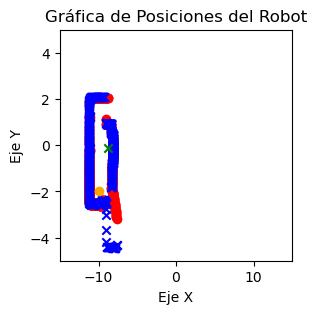

In [35]:
print_two_cloud_points(1,list_closest[1])

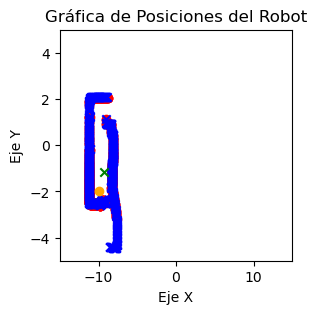

In [36]:
print_two_cloud_points(1,list_closest[2])

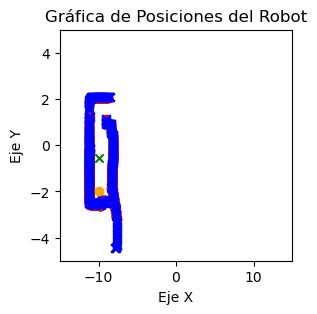

In [37]:
print_two_cloud_points(1,list_closest[3])

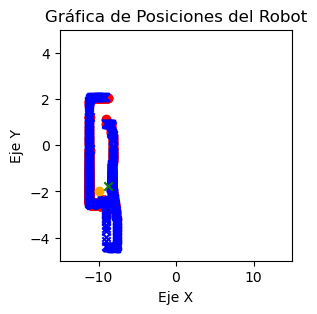

In [38]:
print_two_cloud_points(1,list_closest[4])

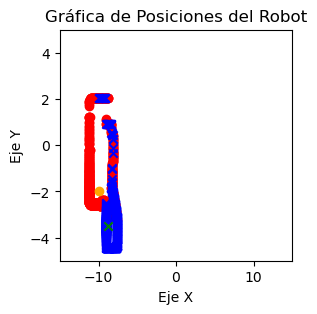

In [39]:
print_two_cloud_points(1,list_closest[5])

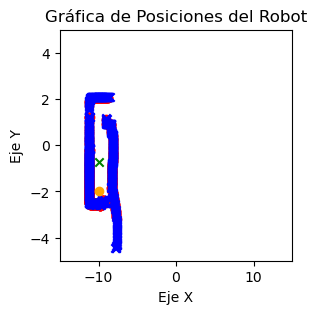

In [40]:
print_two_cloud_points(1,list_closest[6])

# 10. Reducción de dimensión por PCA

In [41]:
from sklearn.decomposition import PCA
import numpy as np

np.random.seed(42) 
X =  model.cloud_embeddings(torch.tensor(range(num_clouds), dtype=torch.long)).detach().numpy()

#Inicializar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)

#Ajustar y transformar los datos
X_reduced = pca.fit_transform(X)

In [42]:
print(X_reduced.shape)

(897, 2)


In [43]:
def print_closest_clouds_PCA(num_cloud, top_num):
    cloud_PCA = X_reduced[num_cloud] 
    dists = np.linalg.norm(X_reduced - cloud_PCA, axis=1)
    #print(dists)
    sorted_differences = sorted(enumerate(dists), key=lambda x: x[1])
    index_differences = [idx for idx, difference in sorted_differences]
    val_differences = [difference for idx, difference in sorted_differences]
    print("Top PCA más cercanos de la nube ", num_cloud)
    print("-"*20)
    i = 0
    for idx, difference in zip(index_differences[0:top_num+1], val_differences[0:top_num+1]):
         print(i,"- Indice nube:", idx, "\t Norma de la diferencia:", difference, 
              "\t Medida de Similitud: ", Nubes_Similitud[num_cloud][idx])
         i+=1

In [44]:
def print_farest_clouds_PCA(num_cloud, top_num):
    cloud_PCA = X_reduced[num_cloud] 
    dists = np.linalg.norm(X_reduced - cloud_PCA, axis=1)
    #print(dists)
    sorted_differences = sorted(enumerate(dists), key=lambda x: x[1])
    sorted_differences = sorted_differences[::-1]

    index_differences = [idx for idx, difference in sorted_differences]
    val_differences = [difference for idx, difference in sorted_differences]
    print("Top PCA más cercanos de la nube ", num_cloud)
    print("-"*20)
    i = 0
    for idx, difference in zip(index_differences[0:top_num+1], val_differences[0:top_num+1]):
         print(i,"- Indice nube:", idx, "\t Norma de la diferencia:", difference, 
              "\t Medida de Similitud: ", Nubes_Similitud[num_cloud][idx])
         i+=1

In [45]:
print_closest_clouds_PCA(1, 10)

Top PCA más cercanos de la nube  1
--------------------
0 - Indice nube: 1 	 Norma de la diferencia: 0.0 	 Medida de Similitud:  0.0
1 - Indice nube: 56 	 Norma de la diferencia: 0.05516261 	 Medida de Similitud:  1.8417835421437982
2 - Indice nube: 6 	 Norma de la diferencia: 0.13699819 	 Medida de Similitud:  1.2074819317566483
3 - Indice nube: 61 	 Norma de la diferencia: 0.1452492 	 Medida de Similitud:  1.4368466190946163
4 - Indice nube: 24 	 Norma de la diferencia: 0.16633226 	 Medida de Similitud:  1.7933079708492088
5 - Indice nube: 88 	 Norma de la diferencia: 0.19045675 	 Medida de Similitud:  1.8401632582656204
6 - Indice nube: 91 	 Norma de la diferencia: 0.19754155 	 Medida de Similitud:  2.2510952777985422
7 - Indice nube: 80 	 Norma de la diferencia: 0.20270358 	 Medida de Similitud:  1.3476922798251898
8 - Indice nube: 87 	 Norma de la diferencia: 0.21183386 	 Medida de Similitud:  1.7818231869000383
9 - Indice nube: 54 	 Norma de la diferencia: 0.25047317 	 Medida de 

In [46]:
print_farest_clouds_PCA(1,10)

Top PCA más cercanos de la nube  1
--------------------
0 - Indice nube: 246 	 Norma de la diferencia: 10.382976 	 Medida de Similitud:  15.648832419949382
1 - Indice nube: 255 	 Norma de la diferencia: 10.244646 	 Medida de Similitud:  14.60099311831336
2 - Indice nube: 257 	 Norma de la diferencia: 10.241403 	 Medida de Similitud:  14.938644546397478
3 - Indice nube: 249 	 Norma de la diferencia: 10.233129 	 Medida de Similitud:  16.507839126564534
4 - Indice nube: 230 	 Norma de la diferencia: 10.206504 	 Medida de Similitud:  15.711408343215487
5 - Indice nube: 245 	 Norma de la diferencia: 10.188108 	 Medida de Similitud:  14.96638156546374
6 - Indice nube: 244 	 Norma de la diferencia: 10.177724 	 Medida de Similitud:  14.945882913379739
7 - Indice nube: 264 	 Norma de la diferencia: 10.1771965 	 Medida de Similitud:  17.321179560157518
8 - Indice nube: 248 	 Norma de la diferencia: 10.158985 	 Medida de Similitud:  16.23675578912729
9 - Indice nube: 306 	 Norma de la diferencia:

Primeras 10 nubes y en rojo la nube más cercana a la nube 1

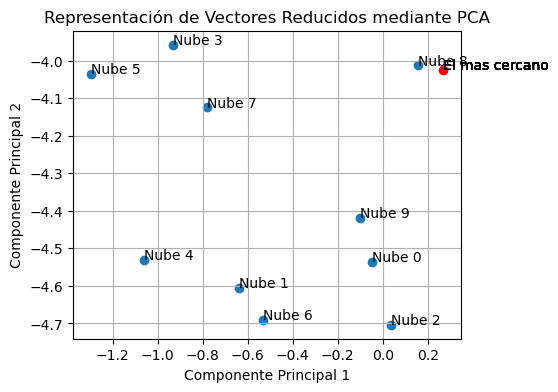

In [47]:
import matplotlib.pyplot as plt

# Suponer que tenemos un arreglo de nombres para cada punto
names = np.array(["Nube {}".format(i) for i in range(10)])

# Crear una gráfica de los puntos reducidos
plt.figure(figsize=(5, 4))
plt.scatter(X_reduced[:10, 0], X_reduced[:10, 1])
plt.scatter(X_reduced[list_closest[1], 0], X_reduced[list_closest[1], 1], color='red')

# Anotar cada punto con su nombre correspondiente
for i, name in enumerate(names):
    plt.annotate(name, (X_reduced[i, 0], X_reduced[i, 1]))
    plt.annotate("El mas cercano", (X_reduced[list_closest[1], 0], X_reduced[list_closest[1],1]))


plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Representación de Vectores Reducidos mediante PCA')
plt.grid(True)
plt.show()

Todas las nubes y resaltadas las 10 primeras nubes

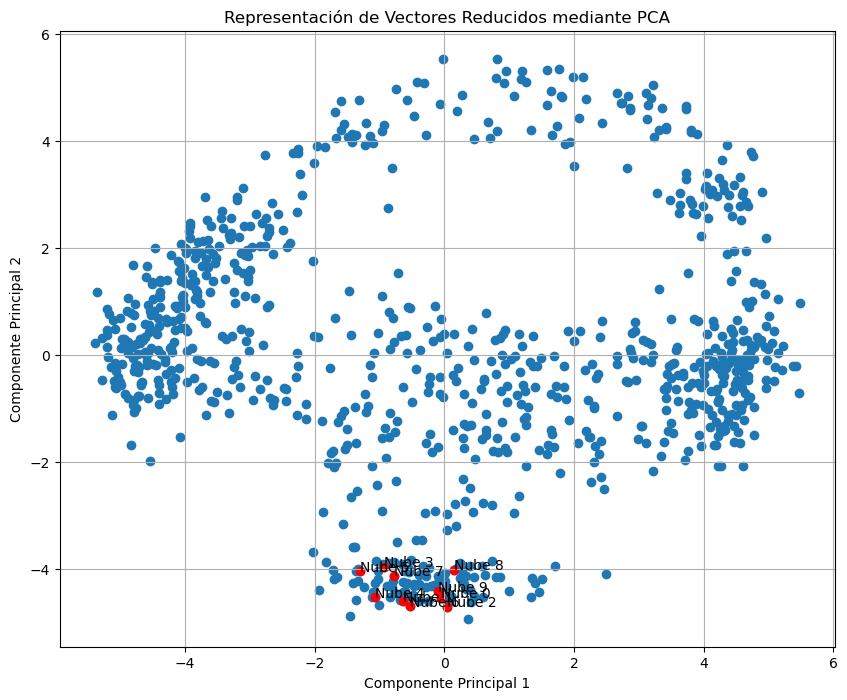

In [49]:
import matplotlib.pyplot as plt


# Crear una gráfica de los puntos reducidos
plt.figure(figsize=(10, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])

# Anotar cada punto con su nombre correspondiente
for i, name in enumerate(names):
    plt.scatter(X_reduced[i, 0], X_reduced[i, 1], color="red")
    plt.annotate(name, (X_reduced[i, 0], X_reduced[i, 1]))

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Representación de Vectores Reducidos mediante PCA')
plt.grid(True)
plt.show()